In [7]:
import pandas as pd

# Load the dataset to examine its structure and contents
file_path = 'Impact_of_Remote_Work_on_Mental_Health.csv'
data = pd.read_csv(file_path)

# Display the first few rows and basic info to understand the structure
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            3804 non-null   object
 12  Access

(  Employee_ID  Age      Gender           Job_Role    Industry  \
 0     EMP0001   32  Non-binary                 HR  Healthcare   
 1     EMP0002   40      Female     Data Scientist          IT   
 2     EMP0003   59  Non-binary  Software Engineer   Education   
 3     EMP0004   27        Male  Software Engineer     Finance   
 4     EMP0005   49        Male              Sales  Consulting   
 
    Years_of_Experience Work_Location  Hours_Worked_Per_Week  \
 0                   13        Hybrid                     47   
 1                    3        Remote                     52   
 2                   22        Hybrid                     46   
 3                   20        Onsite                     32   
 4                   32        Onsite                     35   
 
    Number_of_Virtual_Meetings  Work_Life_Balance_Rating Stress_Level  \
 0                           7                         2       Medium   
 1                           4                         1       Medium 

In [44]:
import numpy as np
import pandas as pd

# Define the work location and column to apply bootstrapping
work_location = 'Remote'  # Change to 'Onsite' or 'Hybrid' if needed
column = 'Hours_Worked_Per_Week'
sims = 1000  # Number of simulations
median_lengths = []

# Filter data for the specific work location
filtered_data = data[data['Work_Location'] == work_location]
Hours = data[column]

# Median of the column
Hours_median = np.median(Hours)

# Calculate 10% of the data size
sample_size = max(int(len(filtered_data) * 0.1), 1) 

# Bootstrapping process
for i in range(sims):
    temp_sample = np.random.choice(Hours, replace=True, size=sample_size)
    sample_median = np.median(temp_sample)
    median_lengths.append(sample_median)

# Calculate bootstrapped median and 95% confidence interval
boot_median = np.median(median_lengths)
boot_95_ci = np.percentile(median_lengths, [2.5, 97.5])

# Print the results
print("Bootstrapped Median Hours Worked for {} = {:.2f}, 95% CI = [{:.2f}, {:.2f}]".format(work_location, boot_median, boot_95_ci[0], boot_95_ci[1]))


Bootstrapped Median Hours Worked for Remote = 39.00, 95% CI = [36.00, 43.00]


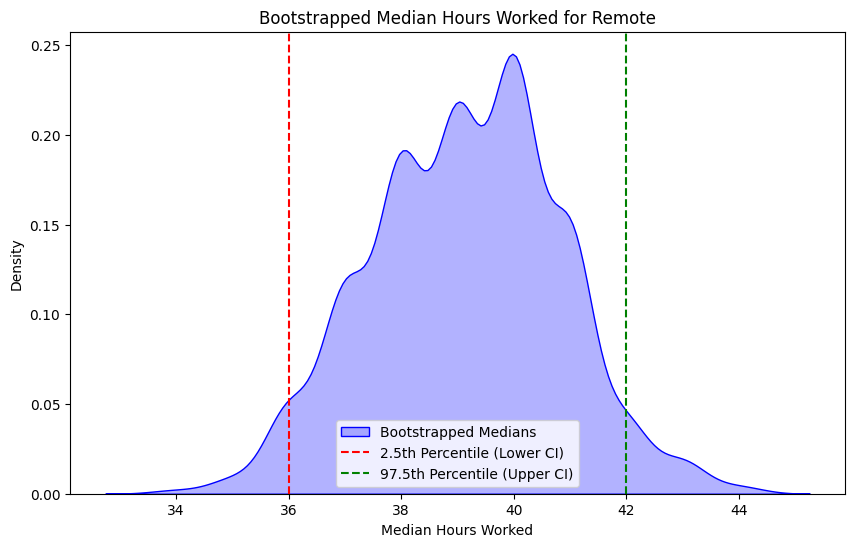

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the work location and column to apply bootstrapping
work_location = 'Remote'  # Change to 'Onsite' or 'Hybrid' if needed
column = 'Hours_Worked_Per_Week'
sims = 1000  # Number of simulations
median_lengths = []

# Filter data for the specific work location
filtered_data = data[data['Work_Location'] == work_location]
Hours = filtered_data[column]

# Calculate 10% of the data size
sample_size = max(int(len(filtered_data) * 0.1), 1)  # Ensure sample size is at least 1

# Bootstrapping process
for i in range(sims):
    temp_sample = np.random.choice(Hours, replace=True, size=sample_size)
    sample_median = np.median(temp_sample)
    median_lengths.append(sample_median)

# Calculate the 95% confidence interval
boot_95_ci = np.percentile(median_lengths, [2.5, 97.5])

# Plotting
plt.figure(figsize=(10, 6))
sns.kdeplot(median_lengths, color='blue', fill=True, alpha=0.3, label="Bootstrapped Medians")
plt.axvline(x=boot_95_ci[0], color='red', linestyle='--', label="2.5th Percentile (Lower CI)")
plt.axvline(x=boot_95_ci[1], color='green', linestyle='--', label="97.5th Percentile (Upper CI)")
plt.title(f"Bootstrapped Median Hours Worked for {work_location}")
plt.xlabel("Median Hours Worked")
plt.ylabel("Density")
plt.legend()
plt.show()
